# **Importing the Required Libraries and Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SKYWARDS_DATA_CW3 (2) (2).csv', encoding='latin-1')
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,N,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,0,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [3]:
data.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Destination', 'Continent',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# **Check for Missing Values**

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0
Arrival Delay in Minutes,310


In [5]:
# Fill missing numeric columns with the mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# **Check for Duplicates**

In [6]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows}')

# Remove duplicates if they exist
if duplicate_rows > 0:
    data = data.drop_duplicates()

Number of duplicate rows: 0


In [7]:
# Check if there are still missing values
missing_values_post_cleaning = data.isnull().sum().sum()

# Check if there are any remaining duplicates
remaining_duplicates = data.duplicated().sum()

# Output the results
print(f'Missing values after cleaning: {missing_values_post_cleaning}')
print(f'Duplicate rows after cleaning: {remaining_duplicates}')

Missing values after cleaning: 0
Duplicate rows after cleaning: 0


In [8]:
# Drop the 'Ref' and 'id' columns
data = data.drop(columns=['Ref', 'id'])

# Confirm the columns have been dropped by displaying the remaining columns
data.columns

Index(['Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel', 'Class',
       'Flight Distance', 'Destination', 'Continent', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
# Loop through all categorical columns and print their unique values and value counts
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique values: {data[column].unique()}")
    print(f"Value counts:\n{data[column].value_counts()}")
    print("-" * 50)  # Separator for readability

Column: Gender
Unique values: ['Male' 'Female']
Value counts:
Gender
Female    52727
Male      51177
Name: count, dtype: int64
--------------------------------------------------
Column: Satisfied
Unique values: ['N' 'Y']
Value counts:
Satisfied
Y    78111
N    25793
Name: count, dtype: int64
--------------------------------------------------
Column: Age Band
Unique values: ['Under 18' '25 to 34' '55 to 64' '45 to 54' '35 to 44' '18 to 24'
 '65 or over']
Value counts:
Age Band
35 to 44      24132
45 to 54      21422
25 to 34      19723
55 to 64      14064
18 to 24      11884
Under 18       7931
65 or over     4748
Name: count, dtype: int64
--------------------------------------------------
Column: Type of Travel
Unique values: ['Personal Travel' 'Business travel']
Value counts:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
--------------------------------------------------
Column: Class
Unique values: ['Eco Plus' 'Business' 'Eco']
Value count

# **Exploratory Data Analysis**

In [10]:
# Summary statistics for numerical columns
summary_stats = data.describe()
summary_stats

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.124259,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.560858,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.716567
min,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### **Satisfaction Distribution**

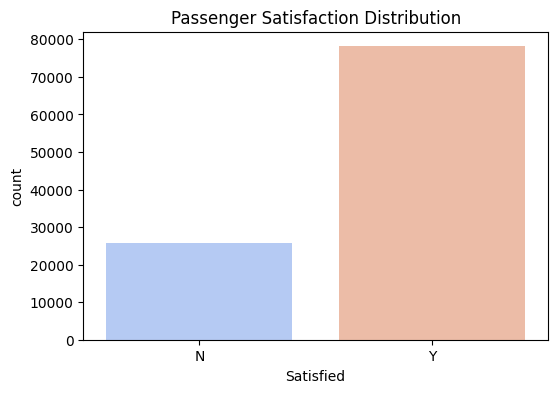

In [11]:
# Plotting the satisfaction distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Satisfied', palette='coolwarm')
plt.title('Passenger Satisfaction Distribution')
plt.show()

In [12]:
# Calculate the counts of each category in the 'Satisfied' column
satisfaction_counts = data['Satisfied'].value_counts()

# Print the counts
print('Passenger Satisfaction Distribution:')
print(satisfaction_counts)

Passenger Satisfaction Distribution:
Satisfied
Y    78111
N    25793
Name: count, dtype: int64


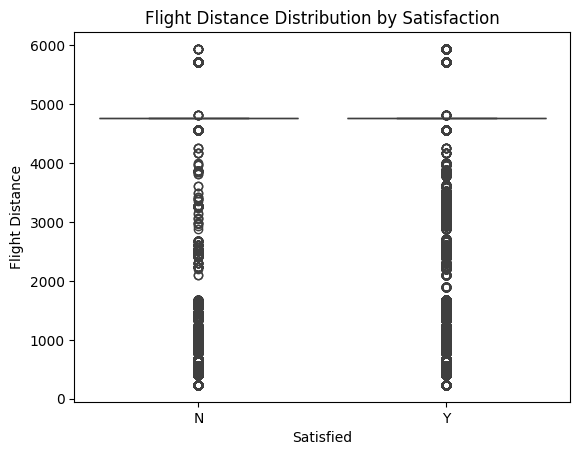

In [13]:
# Distribution of Flight Distance by Satisfaction
sns.boxplot(x='Satisfied', y='Flight Distance', data=data)
plt.title('Flight Distance Distribution by Satisfaction')
plt.show()

In [14]:
# Summary statistics of Flight Distance by Satisfaction
flight_distance_stats = data.groupby('Satisfied')['Flight Distance'].describe()

# Print the summary statistics
print('Distribution of Flight Distance by Satisfaction:')
flight_distance_stats

Distribution of Flight Distance by Satisfaction:


,count,mean,std,min,25%,50%,75%,max
Satisfied,,,,,,,,
N,25793.0,4105.611794,1435.965337,235.0,4760.0,4760.0,4760.0,5940.0
Y,78111.0,4183.374877,1315.409535,235.0,4760.0,4760.0,4760.0,5940.0


### **Passenger Demographics: Age, Gender, and Class**

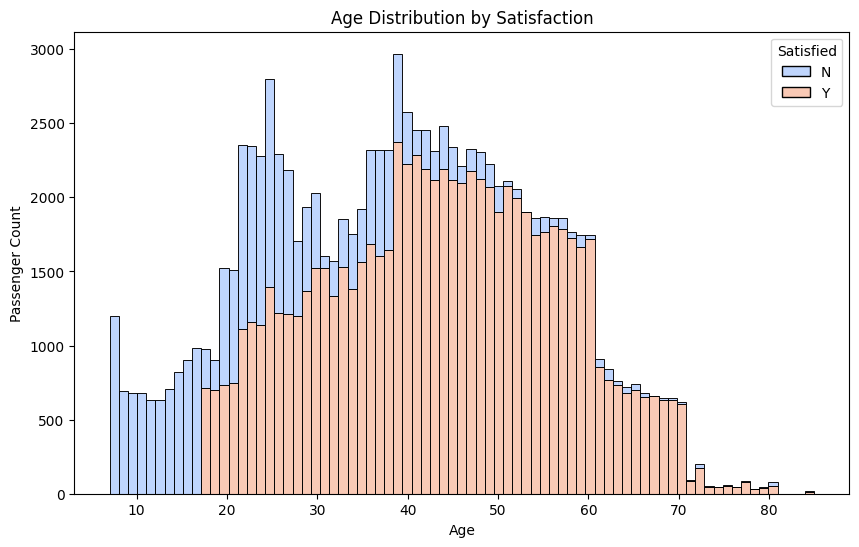

In [15]:
# Plot the age distribution for satisfied and unsatisfied passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Satisfied', multiple='stack', kde=False, palette='coolwarm')
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.show()

In [16]:
# Summary statistics of Age by Satisfaction
age_stats = data.groupby('Satisfied')['Age'].describe()

# Print the summary statistics
print('Age Distribution by Satisfaction:')
print(age_stats)

Age Distribution by Satisfaction:
             count       mean        std   min   25%   50%   75%   max
Satisfied                                                             
N          25793.0  25.603148  12.575837   7.0  16.0  24.0  34.0  85.0
Y          78111.0  43.928858  12.973594  18.0  34.0  44.0  54.0  85.0


In [17]:
# Satisfaction by Gender and Class
pd.crosstab(data['Gender'], data['Class'], margins=True)

Class,Business,Eco,Eco Plus,All
Gender,,,,
Female,24927,23858,3942,52727
Male,24738,22887,3552,51177
All,49665,46745,7494,103904


In [18]:
# Satisfaction by Age Band and Class
pd.crosstab(data['Age Band'], data['Class'], margins=True)

Class,Business,Eco,Eco Plus,All
Age Band,,,,
18 to 24,3578,7563,743,11884
25 to 34,9753,8340,1630,19723
35 to 44,13733,8925,1474,24132
45 to 54,12846,7313,1263,21422
55 to 64,7182,5879,1003,14064
65 or over,1241,2982,525,4748
Under 18,1332,5743,856,7931
All,49665,46745,7494,103904


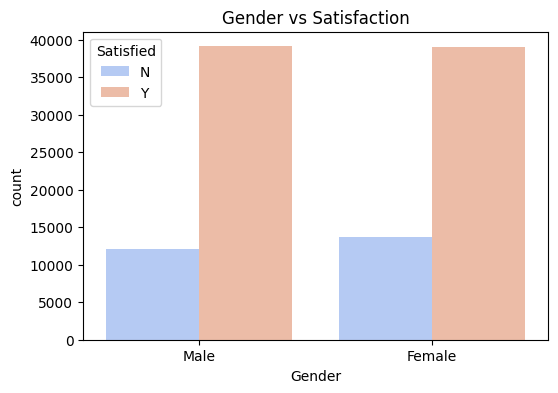

In [19]:
# Plot gender distribution based on satisfaction
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Satisfied', palette='coolwarm')
plt.title('Gender vs Satisfaction')
plt.show()

In [20]:
# Count the number of satisfied and unsatisfied passengers by gender
gender_satisfaction_counts = data.groupby(['Gender', 'Satisfied']).size().unstack()

# Print the counts
print('Gender vs Satisfaction Distribution:')
print(gender_satisfaction_counts)

Gender vs Satisfaction Distribution:
Satisfied      N      Y
Gender                 
Female     13724  39003
Male       12069  39108


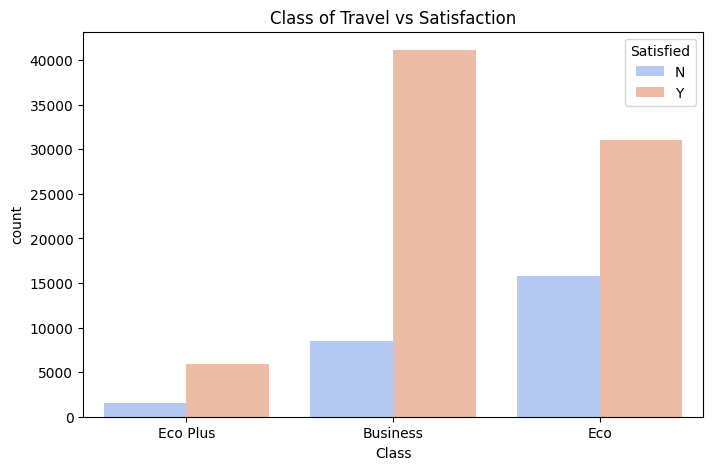

In [21]:
# Plot class distribution based on satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Class', hue='Satisfied', palette='coolwarm')
plt.title('Class of Travel vs Satisfaction')
plt.show()

In [22]:
# Count the number of satisfied and unsatisfied passengers by class
class_satisfaction_counts = data.groupby(['Class', 'Satisfied']).size().unstack()

# Print the counts
print('Class of Travel vs Satisfaction Distribution:')
print(class_satisfaction_counts)

Class of Travel vs Satisfaction Distribution:
Satisfied      N      Y
Class                  
Business    8533  41132
Eco        15732  31013
Eco Plus    1528   5966


### **Key Service Factors Affecting Satisfaction**

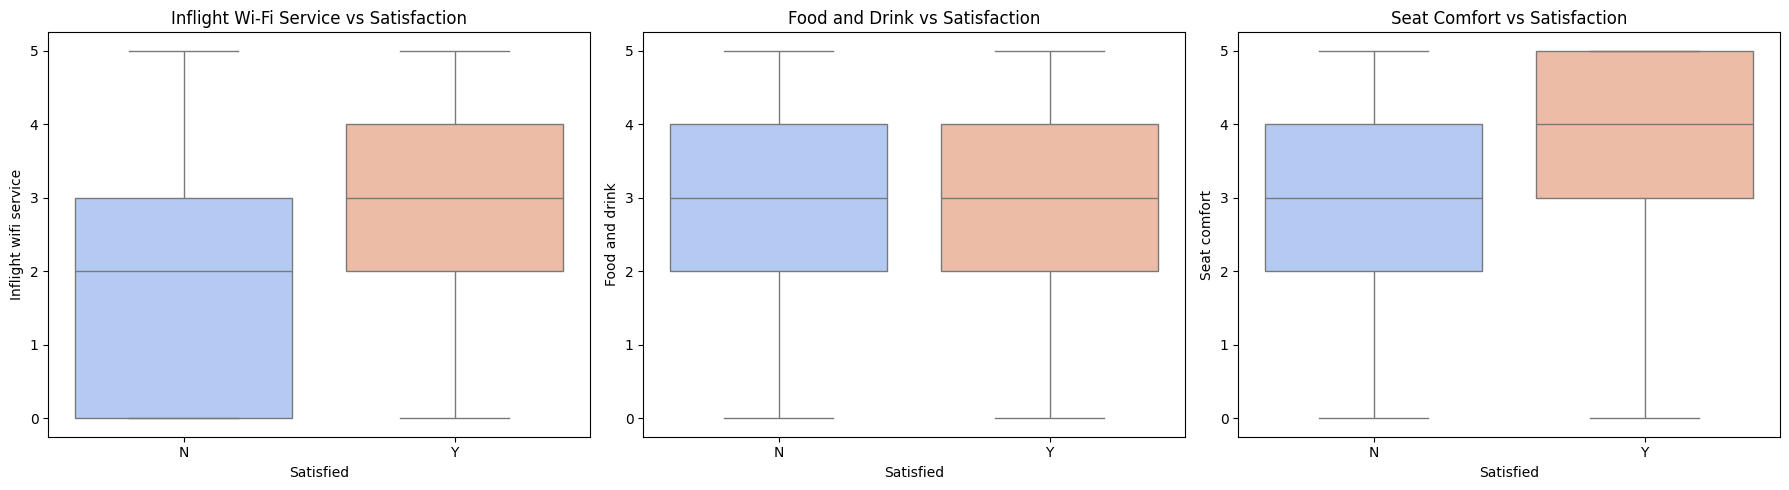

In [23]:
# Plotting impact of inflight wifi service, food, and seat comfort on satisfaction
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=data, x='Satisfied', y='Inflight wifi service', palette='coolwarm', ax=ax[0])
ax[0].set_title('Inflight Wi-Fi Service vs Satisfaction')

sns.boxplot(data=data, x='Satisfied', y='Food and drink', palette='coolwarm', ax=ax[1])
ax[1].set_title('Food and Drink vs Satisfaction')

sns.boxplot(data=data, x='Satisfied', y='Seat comfort', palette='coolwarm', ax=ax[2])
ax[2].set_title('Seat Comfort vs Satisfaction')

plt.tight_layout()
plt.show()

In [24]:
# Summary statistics of Inflight Wi-Fi Service, Food and Drink, and Seat Comfort by Satisfaction

# Inflight Wi-Fi Service
wifi_stats = data.groupby('Satisfied')['Inflight wifi service'].describe()
print('Inflight Wi-Fi Service vs Satisfaction Distribution:')
print(wifi_stats)
print()

# Food and Drink
food_stats = data.groupby('Satisfied')['Food and drink'].describe()
print('Food and Drink vs Satisfaction Distribution:')
print(food_stats)
print()

# Seat Comfort
seat_comfort_stats = data.groupby('Satisfied')['Seat comfort'].describe()
print('Seat Comfort vs Satisfaction Distribution:')
print(seat_comfort_stats)

Inflight Wi-Fi Service vs Satisfaction Distribution:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          25793.0  1.832629  1.527768  0.0  0.0  2.0  3.0  5.0
Y          78111.0  2.750061  1.344926  0.0  2.0  3.0  4.0  5.0

Food and Drink vs Satisfaction Distribution:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          25793.0  3.033536  1.379097  0.0  2.0  3.0  4.0  5.0
Y          78111.0  3.257659  1.308131  0.0  2.0  3.0  4.0  5.0

Seat Comfort vs Satisfaction Distribution:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          25793.0  2.985539  1.408164  0.0  2.0  3.0  4.0  5.0
Y          78111.0  3.535085  1.323529  0.0  3.0  4.0  5.0  5.0


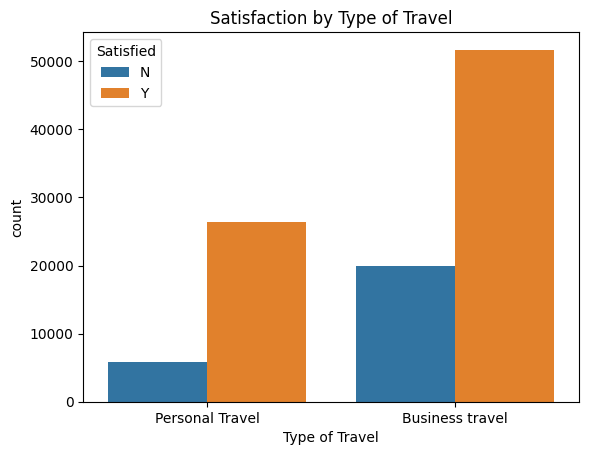

In [25]:
sns.countplot(x='Type of Travel', hue='Satisfied', data=data)
plt.title('Satisfaction by Type of Travel')
plt.show()

In [26]:
# Count of satisfaction by Type of Travel
travel_satisfaction_counts = data.groupby(['Type of Travel', 'Satisfied']).size().unstack()

# Print the counts
print('Satisfaction by Type of Travel:')
print(travel_satisfaction_counts)

Satisfaction by Type of Travel:
Satisfied            N      Y
Type of Travel               
Business travel  19968  51687
Personal Travel   5825  26424


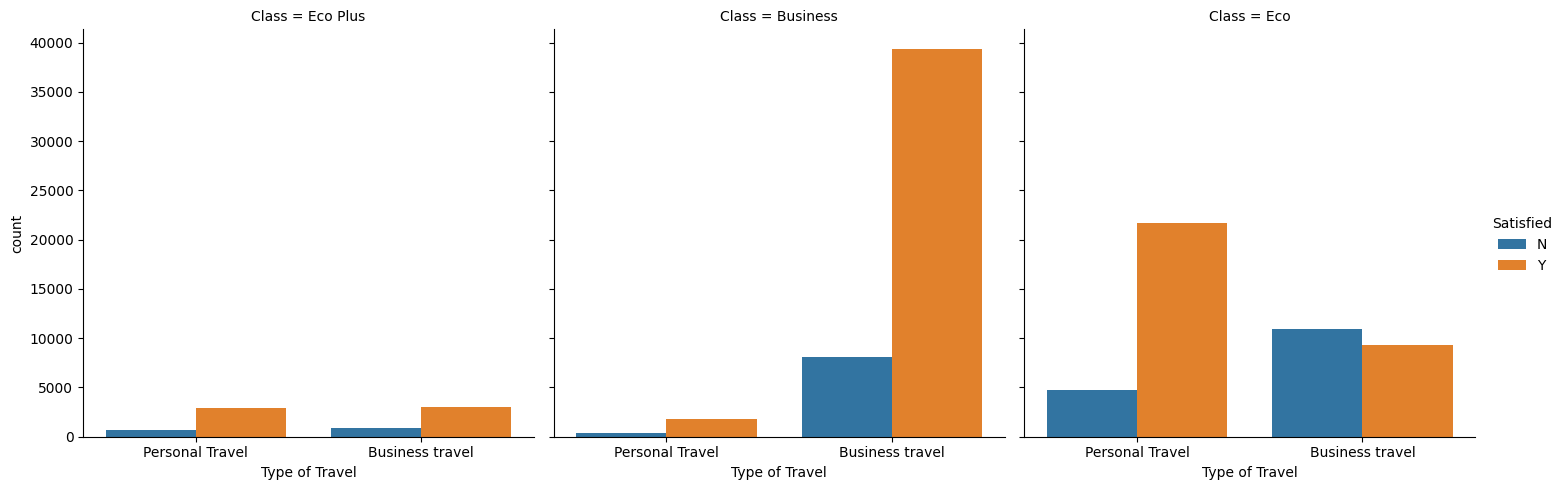

In [27]:
# Satisfaction by Travel Type and Class
sns.catplot(x="Type of Travel", hue="Satisfied", col="Class", data=data, kind="count")
plt.show()

In [28]:
# Count of satisfaction by Type of Travel and Class
travel_class_satisfaction_counts = data.groupby(['Class', 'Type of Travel', 'Satisfied']).size().unstack()

# Print the counts
print('Satisfaction by Travel Type and Class:')
print(travel_class_satisfaction_counts)

Satisfaction by Travel Type and Class:
Satisfied                     N      Y
Class    Type of Travel               
Business Business travel   8132  39376
         Personal Travel    401   1756
Eco      Business travel  10959   9298
         Personal Travel   4773  21715
Eco Plus Business travel    877   3013
         Personal Travel    651   2953


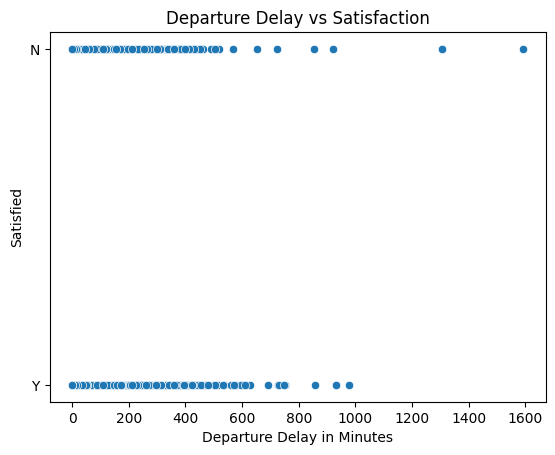

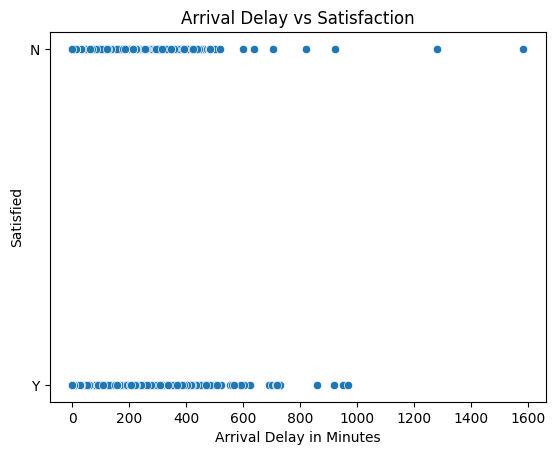

In [29]:
# Scatter plot of Departure Delay vs Satisfaction
sns.scatterplot(x='Departure Delay in Minutes', y='Satisfied', data=data)
plt.title('Departure Delay vs Satisfaction')
plt.show()

# Scatter plot of Arrival Delay vs Satisfaction
sns.scatterplot(x='Arrival Delay in Minutes', y='Satisfied', data=data)
plt.title('Arrival Delay vs Satisfaction')
plt.show()

### **Impact of Flight Delays on Satisfaction**

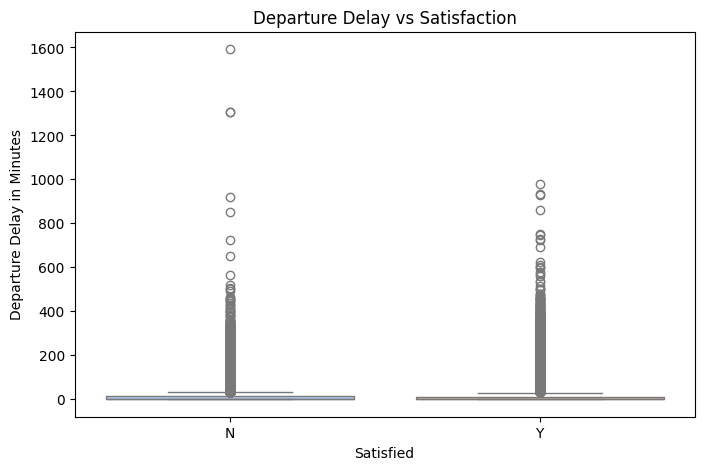

In [30]:
# Boxplot of Departure Delay in Minutes vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Satisfied', y='Departure Delay in Minutes', palette='coolwarm')
plt.title('Departure Delay vs Satisfaction')
plt.show()

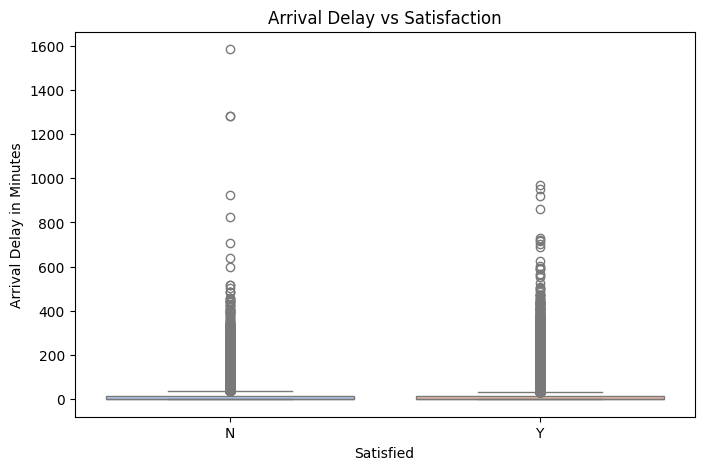

In [31]:
# Boxplot of Arrival Delay in Minutes vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Satisfied', y='Arrival Delay in Minutes', palette='coolwarm')
plt.title('Arrival Delay vs Satisfaction')
plt.show()

# **Data Preprocessing**

In [32]:
# Dropping 'Destination' and 'Continent' columns
data_cleaned = data.drop(columns=['Destination', 'Continent'])

# Label encoding categorical columns
label_encoder = LabelEncoder()

# Identifying categorical columns for label encoding
categorical_columns = ['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class']

# Applying label encoding to each categorical column
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Display the first few rows of the cleaned and encoded data
data_cleaned.head()

,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,6,1,2,4760,3,4,3,...,5,0,4,3,4,4,5,5,25,18.0
1,1,0,25,1,0,0,235,0,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,1,0,0,4760,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,1,0,0,560,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,4,0,0,4760,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


# **Correlation Matrix Focused on Satisfaction**

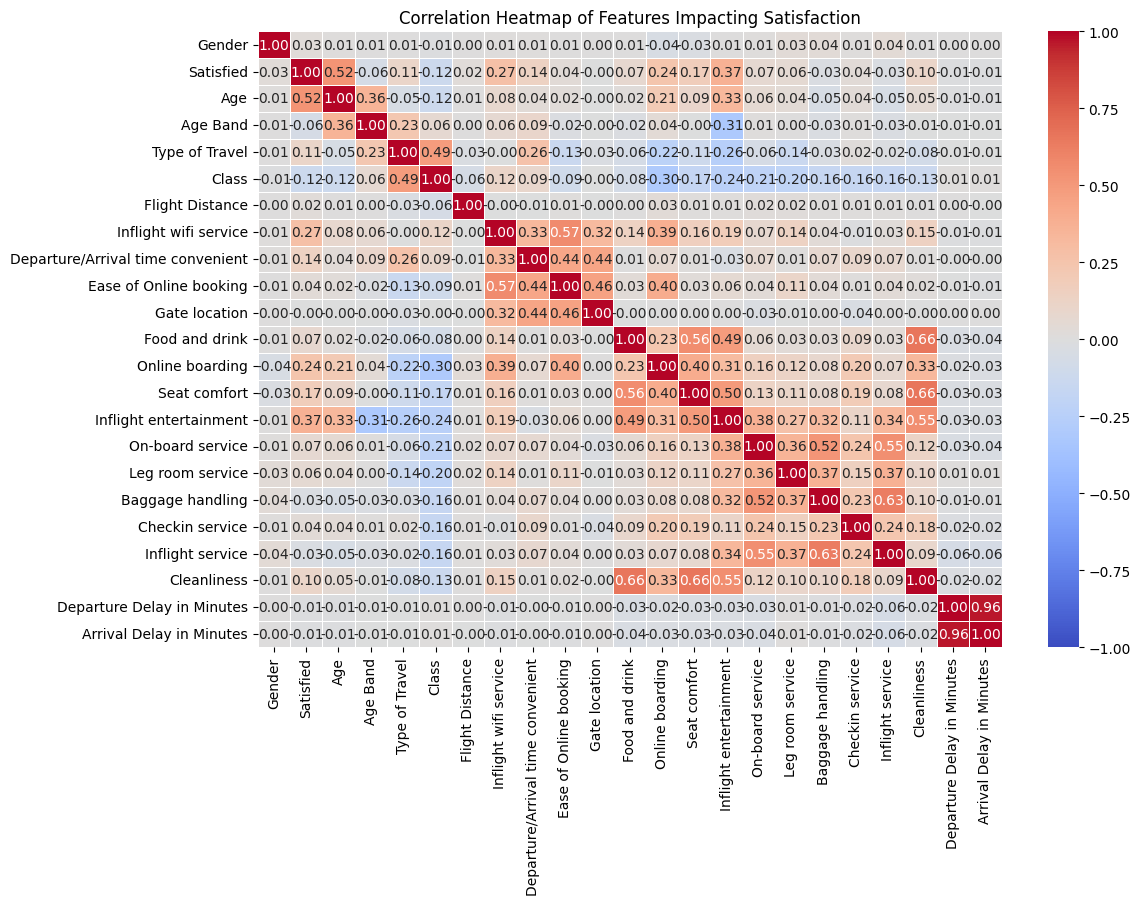

In [33]:
# Correlation heatmap to visualize relationships between variables
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features Impacting Satisfaction')
plt.show()

In [34]:
# Correlation with satisfaction
satisfaction_corr = data_cleaned.corr()['Satisfied'].sort_values(ascending=False)

# Display correlations with satisfaction
satisfaction_corr

,Satisfied
Satisfied,1.000000
Age,0.523758
Inflight entertainment,0.373439
Inflight wifi service,0.273733
Online boarding,0.243138
Seat comfort,0.173815
Departure/Arrival time convenient,0.140570
Type of Travel,0.105000
Cleanliness,0.102504
Food and drink,0.072817


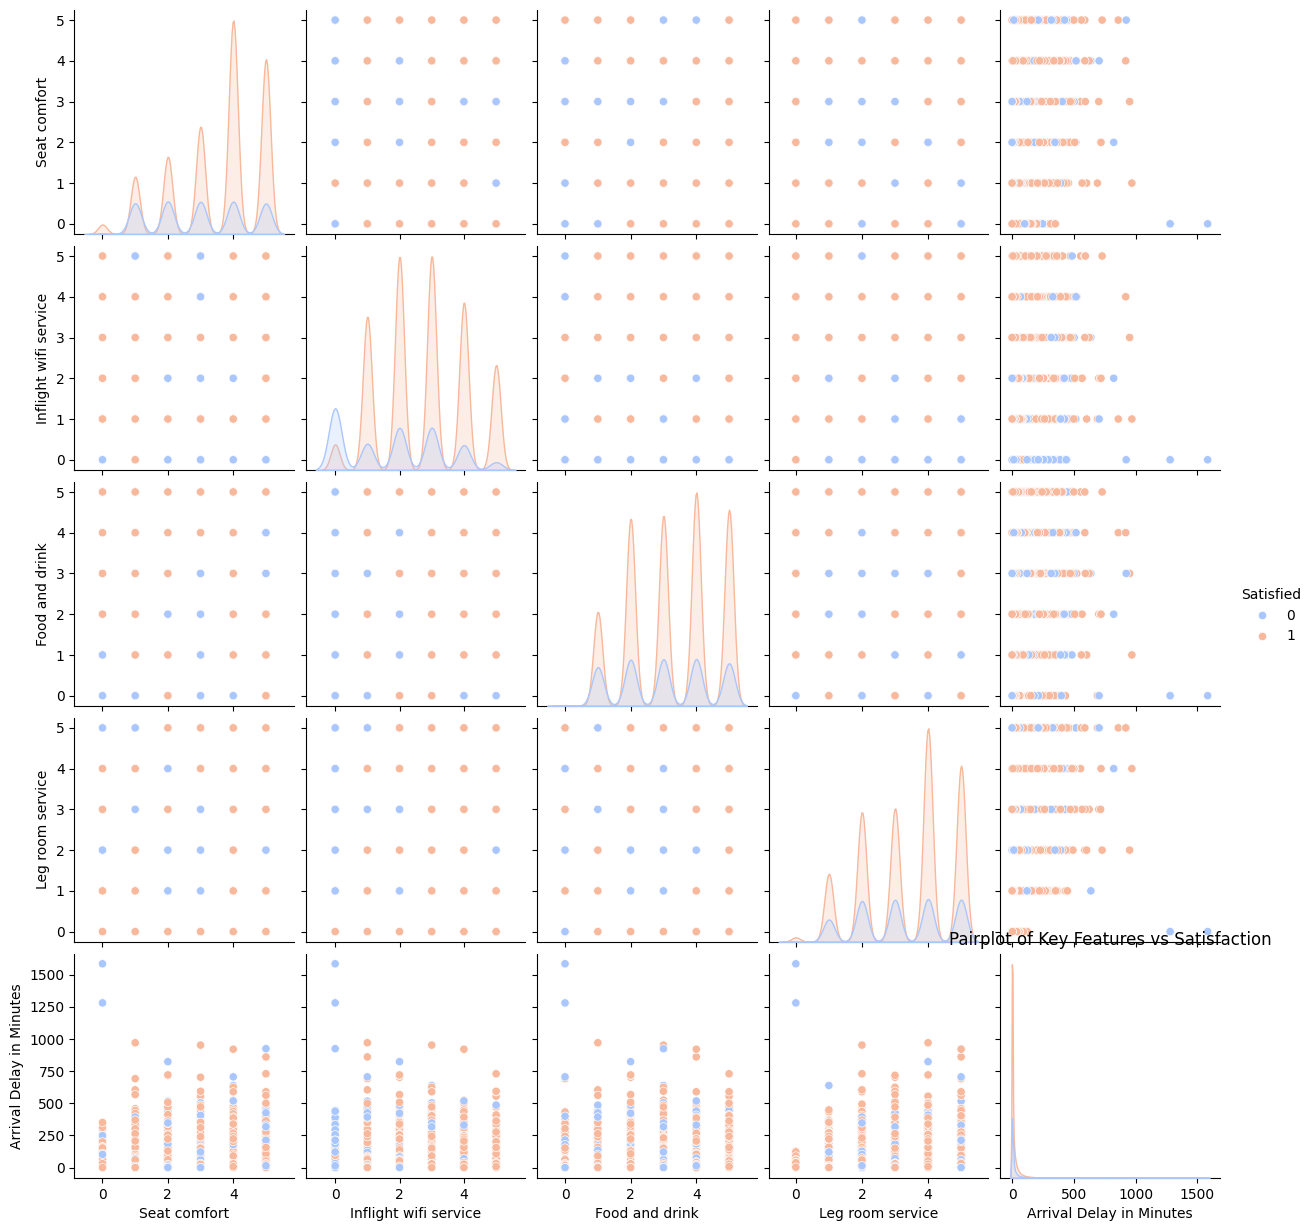

In [35]:
# Pairplot for key features with satisfaction
sns.pairplot(data_cleaned, vars=['Seat comfort', 'Inflight wifi service', 'Food and drink', 'Leg room service', 'Arrival Delay in Minutes'], hue='Satisfied', palette='coolwarm')
plt.title('Pairplot of Key Features vs Satisfaction')
plt.show()

# **Building Analytical Models**

In [36]:
# Splitting the data into features (X) and target variable (y)
X = data_cleaned.drop(columns=['Satisfied'])  # Features
y = data_cleaned['Satisfied']                   # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (83123, 22)
Testing set shape: (20781, 22)


In [37]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

In [38]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# **Evaluating the Models**

In [39]:
# Evaluate the random forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_correct_predictions = rf_confusion_matrix[1, 1] + rf_confusion_matrix[0, 0]
rf_incorrect_predictions = rf_confusion_matrix[1, 0] + rf_confusion_matrix[0, 1]

# Extracting metrics for Random Forest
rf_precision = precision_score(y_test, rf_predictions, pos_label= 1)
rf_recall = recall_score(y_test, rf_predictions, pos_label= 1)
rf_f1 = f1_score(y_test, rf_predictions, pos_label= 1)

In [40]:
# Print evaluation results
print("Random Forest Model Evaluation")
print("Accuracy:", rf_accuracy)
print("Correct Predictions:", rf_correct_predictions)
print("Incorrect Predictions:", rf_incorrect_predictions)

Random Forest Model Evaluation
Accuracy: 0.9906645493479621
Correct Predictions: 20587
Incorrect Predictions: 194


In [41]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_correct_predictions = xgb_confusion_matrix[1, 1] + xgb_confusion_matrix[0, 0]
xgb_incorrect_predictions = xgb_confusion_matrix[1, 0] + xgb_confusion_matrix[0, 1]


# Extracting metrics for XGBoost
xgb_precision = precision_score(y_test, xgb_predictions, pos_label= 1)
xgb_recall = recall_score(y_test, xgb_predictions, pos_label= 1)
xgb_f1 = f1_score(y_test, xgb_predictions, pos_label= 1)

In [42]:
# Print evaluation results
print("XGBoost Model Evaluation")
print("Accuracy:", xgb_accuracy)
print("Correct Predictions:", xgb_correct_predictions)
print("Incorrect Predictions:", xgb_incorrect_predictions)

XGBoost Model Evaluation
Accuracy: 0.9930224724507964
Correct Predictions: 20636
Incorrect Predictions: 145


# **Comparing the Results**

In [43]:
# Creating a comparison DataFrame
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'Precision': [rf_precision, xgb_precision],
    'Recall': [rf_recall, xgb_recall],
    'F1 Score': [rf_f1, xgb_f1],
    'Correct Predictions': [rf_correct_predictions, xgb_correct_predictions],
    'Incorrect Predictions': [rf_incorrect_predictions, xgb_incorrect_predictions]
})

# Display the comparison table
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Correct Predictions,Incorrect Predictions
0,Random Forest,0.990665,0.992057,0.99560,0.993826,20587,194
1,XGBoost,0.993022,0.994148,0.99662,0.995383,20636,145


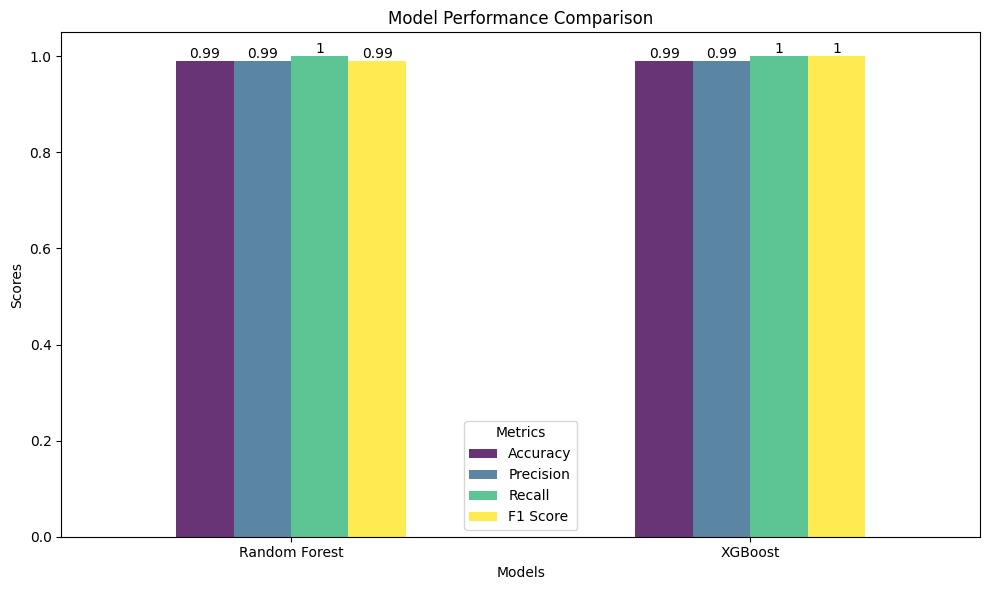

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the accuracy and other metrics are already defined
# Rounding the metrics to 2 significant figures
rf_accuracy = round(rf_accuracy, 3)
xgb_accuracy = round(xgb_accuracy, 3)
rf_precision = round(rf_precision, 3)
xgb_precision = round(xgb_precision, 3)
rf_recall = round(rf_recall, 3)
xgb_recall = round(xgb_recall, 3)
rf_f1 = round(rf_f1, 3)
xgb_f1 = round(xgb_f1, 3)

# Creating a comparison DataFrame with rounded values
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'Precision': [rf_precision, xgb_precision],
    'Recall': [rf_recall, xgb_recall],
    'F1 Score': [rf_f1, xgb_f1],
})

# Set the index to the 'Model' column for easier plotting
results_df.set_index('Model', inplace=True)

# Plotting the bar chart
ax = results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', alpha=0.8)

# Adding annotations to the bars
for container in ax.containers:
    ax.bar_label(container)

# Adding title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Show the plot
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()
